In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [19]:
df = pd.read_csv("diabetes.csv")

In [20]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

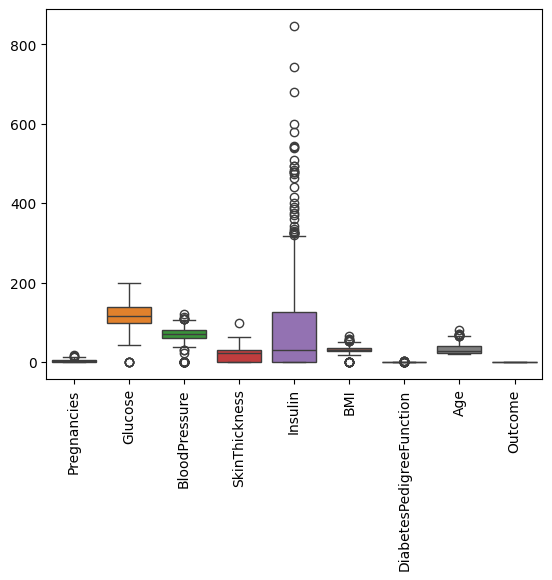

In [24]:
sb.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

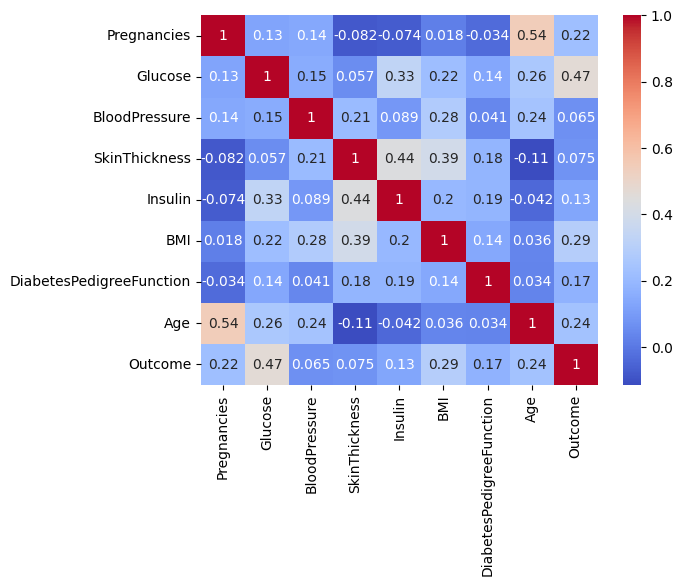

In [26]:
sb.heatmap(df.corr() , annot=True , cmap = "coolwarm")
plt.show()

In [27]:
X = df.drop("Outcome" , axis=1)

In [28]:
y = df['Outcome']

In [29]:
X , y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20 , random_state = 42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.fit_transform(X_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train , y_train)

KNeighborsClassifier()

In [41]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

In [42]:
knn_pred = knn.predict(X_test)
rf_pred = rf.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, mean_squared_error, r2_score

In [45]:
k = confusion_matrix(y_test,knn_pred)
k

array([[83, 16],
       [31, 24]], dtype=int64)

In [46]:
r = confusion_matrix(y_test,rf_pred)
r

array([[84, 15],
       [22, 33]], dtype=int64)

In [48]:
print("Accuracy of KNN :" , accuracy_score(y_test , knn_pred))

Accuracy of KNN : 0.6948051948051948


In [49]:
print("Accuracy of RF :" , accuracy_score(y_test , rf_pred))

Accuracy of RF : 0.7597402597402597


In [50]:
print("MSE of KNN :" , mean_squared_error(y_test , knn_pred))

MSE of KNN : 0.3051948051948052


In [51]:
print("MSE of RF :" , mean_squared_error(y_test , rf_pred))

MSE of RF : 0.24025974025974026


In [53]:
print("ROC_SCORE of KNN : " ,roc_auc_score(y_test, knn_pred))
print("ROC_SCORE of RF : " ,roc_auc_score(y_test, rf_pred))

ROC_SCORE of KNN :  0.6373737373737374
ROC_SCORE of RF :  0.7242424242424242


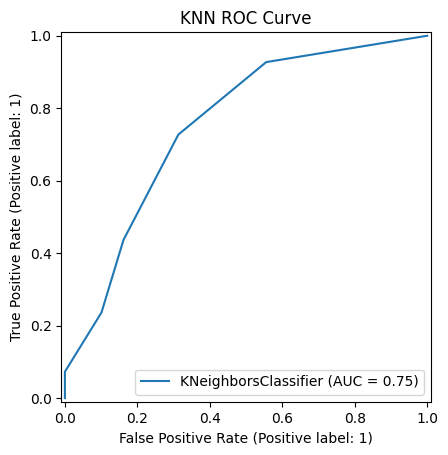

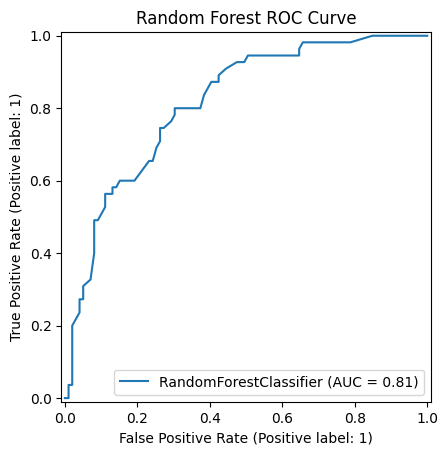

In [56]:
from sklearn.metrics import RocCurveDisplay

# Plot ROC Curve for KNN
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title("KNN ROC Curve")
plt.show()

# Plot ROC Curve for Random Forest
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()
